<p Style= "text-align: right"> 06/24/2023 </p>

<img src = "real_state_for_sale.jpg">
<h2 Style = "color:#48586f; text-align: center; font-weight: bold" > Proyecto: Análisis de la venta de bienes raíces en el Estado de Connecticut desde el año 2001 al 2020. </h2>

<p> A través de este proyecto se pretende realizar la aplicación de los contenidos observados durante el desarrollo del curso de Análisis de Datos. </p>

<p Style = "text-align: justify"> En este caso se realizará un análisis de los datos de las ventas de bienes raíces del Estado de Connecticut desde el año 2001 al 2020.</p>

<h3 Style = "text-align: center; font-weight: bold; color: #ff995e" > Preguntas de Investigación: </h3>
    
<p
<ol>
    <li> ¿Cuál es el ingreso anual de las propiedades vendidas?
    <li> ¿Qué tipo de propiedad tiene mayor facilidad de venta?
    <li> ¿En cuál ciudad o pueblo se dan mayor cantidad de ventas de propiedades? ¿Qué elementos particulares tienen esas ciudades o pueblos?
    <li> ¿Cuál es el costo promedio de las propiedades residenciales y comerciales? 
    <li> ¿Cuáles tipo de propiedades residenciales que se venden con mayor frecuencia, dónde y con qué costo promedio?
    <li> ¿Cuál es el margen promedio de ganancia por cada una de las propiedades vendidas?   
<ol>
</p>
<p Style = "text-align: justify"> Adicionalmente, en función de los datos se determinará una estrategia de ventas de propiedades en alguna ciudad. Y también se incluirán otros datos que por el contexto del negocio son relevantes para la toma de decisiones.</p>

</br>

In [1]:
import pandas as pd #Se usa para el manejo de dataFrame.
import numpy as np #Se usa para el manejo de estructuras de datos.
import matplotlib.pyplot as plt #Se usa para crear graficos.
from matplotlib.ticker import FuncFormatter

<h4 Style = "color: #FF8C00"> Importacion de set de datos del proyecto </h4>

In [2]:
cols = ["Serial Number", "List Year", "Date Recorded", "Town", "Address", "Assessed Value",
        "Sale Amount", "Sales Ratio", "Property Type", "Residential Type", "Non Use Code",
        "Assessor Remarks", "OPM remarks", "Location"]

df_proyecto = pd.read_csv("DataSet.csv", usecols=range(14), low_memory=False)

<h4 Style = "color: #6495ED"> Exploracion inicial del set de datos del proyecto </h4>

In [3]:
df_proyecto.shape

(200013, 14)

In [4]:
df_proyecto.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

In [5]:
df_proyecto.head(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000,0.463,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/2/2020,Ashford,390 TURNPIKE RD,253000,430000,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,3/9/2021,Avon,5 CHESTNUT DRIVE,130400,179900,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,4/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,7/2/2021,Avon,70 FAR HILLS DRIVE,862330,1447500,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [6]:
df_proyecto.describe(include = 'all')

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
count,2.000130e+05,200013.000000,200011,200013,200009,200013,200011,200011,66296,60882,45783,14350,2895,57095
unique,NaN,NaN,2413,169,177821,41926,15702,114428,6,5,91,7970,1668,48863
top,NaN,NaN,7/1/2002,Stamford,MULTI ADDRESSES,0,150000,0,Residential,Single Family,7,ESTATE SALE,GOOD SALE PER MLS,0
freq,NaN,NaN,779,7853,475,1537,1992,2252,60506,43267,9299,466,229,49
mean,1.112790e+06,2007.822467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.272975e+07,8.656000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,2001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.096800e+04,2001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.040100e+04,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000610e+05,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4 Style = "color: #008B8B"> Manejo valores faltantes del set de datos del proyecto </h4>

In [7]:
df_proyecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200013 entries, 0 to 200012
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Serial Number     200013 non-null  int64 
 1   List Year         200013 non-null  int64 
 2   Date Recorded     200011 non-null  object
 3   Town              200013 non-null  object
 4   Address           200009 non-null  object
 5   Assessed Value    200013 non-null  object
 6   Sale Amount       200011 non-null  object
 7   Sales Ratio       200011 non-null  object
 8   Property Type     66296 non-null   object
 9   Residential Type  60882 non-null   object
 10  Non Use Code      45783 non-null   object
 11  Assessor Remarks  14350 non-null   object
 12  OPM remarks       2895 non-null    object
 13  Location          57095 non-null   object
dtypes: int64(2), object(12)
memory usage: 21.4+ MB


In [8]:
dfTemp = df_proyecto.isnull()
dfTemp.head(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,False,False,False,False,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,True,True,True,True


In [9]:
dfTemp = df_proyecto.isnull()
for col in dfTemp.columns.values.tolist():
    print(col)
    print(dfTemp[col].value_counts())
    print("")

Serial Number
False    200013
Name: Serial Number, dtype: int64

List Year
False    200013
Name: List Year, dtype: int64

Date Recorded
False    200011
True          2
Name: Date Recorded, dtype: int64

Town
False    200013
Name: Town, dtype: int64

Address
False    200009
True          4
Name: Address, dtype: int64

Assessed Value
False    200013
Name: Assessed Value, dtype: int64

Sale Amount
False    200011
True          2
Name: Sale Amount, dtype: int64

Sales Ratio
False    200011
True          2
Name: Sales Ratio, dtype: int64

Property Type
True     133717
False     66296
Name: Property Type, dtype: int64

Residential Type
True     139131
False     60882
Name: Residential Type, dtype: int64

Non Use Code
True     154230
False     45783
Name: Non Use Code, dtype: int64

Assessor Remarks
True     185663
False     14350
Name: Assessor Remarks, dtype: int64

OPM remarks
True     197118
False      2895
Name: OPM remarks, dtype: int64

Location
True     142918
False     57095
Name: Lo

In [10]:
# Basado en la necesidad del negocio, se procede a eliminar las variables que no son pertienentes y que además algunas tienen pocos o muy pocos registros.
# En el caso de la variable Sales Ratio, esta se decide eliminar debido a que se identificaron muchas incosistencias en los
# datos de esta variable. 
df_proyecto.drop(['Non Use Code', 'Assessor Remarks', 'OPM remarks','Location', 'Sales Ratio'], axis=1, inplace=True)

In [11]:
df_proyecto.head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Property Type,Residential Type
0,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000,Commercial,NaN
1,20002,2020,10/2/2020,Ashford,390 TURNPIKE RD,253000,430000,Residential,Single Family
2,200212,2020,3/9/2021,Avon,5 CHESTNUT DRIVE,130400,179900,Residential,Condo
3,200243,2020,4/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000,Residential,Single Family
4,200377,2020,7/2/2021,Avon,70 FAR HILLS DRIVE,862330,1447500,Residential,Single Family
5,200109,2020,12/9/2020,Avon,57 FAR HILLS DRIVE,847520,1250000,Residential,Single Family
6,2020180,2020,3/1/2021,Berlin,1539 FARMINGTON AVE,234200,130000,Residential,Two Family
7,2020313,2020,7/1/2021,Berlin,216 WATCH HILL RD,412000,677500,Residential,Single Family
8,200097,2020,6/4/2021,Bethany,23 AMITY RD,511000,795000,Commercial,NaN
9,20139,2020,12/16/2020,Bethel,16 DEEPWOOD DRIVE,171360,335000,Residential,Single Family


In [12]:
# Se eliminan valores faltantes vinculadas a la variable "serial number"

df_proyecto.dropna(subset = ["Serial Number", "Date Recorded", "Address"], axis=0, inplace=True)
#ajuste de indice
df_proyecto.reset_index(drop=True, inplace=True)

In [13]:
dfTemp = df_proyecto.isnull()
for col in dfTemp.columns.values.tolist():
    print(col)
    print(dfTemp[col].value_counts())
    print("")

Serial Number
False    200009
Name: Serial Number, dtype: int64

List Year
False    200009
Name: List Year, dtype: int64

Date Recorded
False    200009
Name: Date Recorded, dtype: int64

Town
False    200009
Name: Town, dtype: int64

Address
False    200009
Name: Address, dtype: int64

Assessed Value
False    200009
Name: Assessed Value, dtype: int64

Sale Amount
False    200007
True          2
Name: Sale Amount, dtype: int64

Property Type
True     133713
False     66296
Name: Property Type, dtype: int64

Residential Type
True     139127
False     60882
Name: Residential Type, dtype: int64



In [14]:
# Se procede a realizar la imputacion de valores faltantes por variable.
# Imputacion de Sale Amount

df_proyecto['Sale Amount'].value_counts().idxmax()

'150000'

In [15]:
df_proyecto['Sale Amount'].replace(np.nan, '150000.00', inplace=True)

In [16]:
# Se analizo imputar las varialbles de Property Type y Residential Type, sin embargo, al tener que el porcentaje
# de sustitucion supera el 65% en ambas variables, es un sesgo demasiado grande como para poder imputar.

In [17]:
dfTemp = df_proyecto.isnull()
for col in dfTemp.columns.values.tolist():
    print(col)
    print(dfTemp[col].value_counts())
    print("")

Serial Number
False    200009
Name: Serial Number, dtype: int64

List Year
False    200009
Name: List Year, dtype: int64

Date Recorded
False    200009
Name: Date Recorded, dtype: int64

Town
False    200009
Name: Town, dtype: int64

Address
False    200009
Name: Address, dtype: int64

Assessed Value
False    200009
Name: Assessed Value, dtype: int64

Sale Amount
False    200009
Name: Sale Amount, dtype: int64

Property Type
True     133713
False     66296
Name: Property Type, dtype: int64

Residential Type
True     139127
False     60882
Name: Residential Type, dtype: int64



<h4 Style = "color: #BDB76B"> Ajuste de encabezados a buenas practicas </h4>

In [18]:
# Cambio del nombre de columnas del primer dataset para ajustarlas a buenas practicas
df_proyecto.rename({'Serial Number':'serialNumber'}, axis=1, inplace=True)
df_proyecto.rename({'List Year':'listYear'}, axis=1, inplace=True)
df_proyecto.rename({'Date Recorded':'dateRecorded'}, axis=1, inplace=True)
df_proyecto.rename({'Town':'town'}, axis=1, inplace=True)
df_proyecto.rename({'Address':'address'}, axis=1, inplace=True)
df_proyecto.rename({'Assessed Value':'assessedValue'}, axis=1, inplace=True)
df_proyecto.rename({'Sale Amount':'saleAmount'}, axis=1, inplace=True)
df_proyecto.rename({'Sales Ratio':'salesRatio'}, axis=1, inplace=True)
df_proyecto.rename({'Property Type':'propertyType'}, axis=1, inplace=True)
df_proyecto.rename({'Residential Type':'residentialType'}, axis=1, inplace=True)

In [19]:
#comprobacion del cambio de nombres.
df_proyecto.columns


Index(['serialNumber', 'listYear', 'dateRecorded', 'town', 'address',
       'assessedValue', 'saleAmount', 'propertyType', 'residentialType'],
      dtype='object')

<h4 Style = "color: #4B0082"> Estandarizacion de los datos </h4>

In [20]:
#Se identifica el tipo de variables.

df_proyecto.dtypes

serialNumber        int64
listYear            int64
dateRecorded       object
town               object
address            object
assessedValue      object
saleAmount         object
propertyType       object
residentialType    object
dtype: object

In [21]:
#Variables que deberian ser numericas de acuerdo al dataset en Kaggle: Assessed Value, Sale Amount.
# Date recorded es una variable tipo fecha. 

In [22]:
# Se cambia el tipo de variable (a la que realmente corresponde) de acuerdo con la metadata del dataset. 
# Cambio de variables a tipo int. 


In [23]:
df_proyecto[["serialNumber", "listYear"]] = df_proyecto [["serialNumber", "listYear"]].astype("int")
df_proyecto.dtypes

serialNumber        int32
listYear            int32
dateRecorded       object
town               object
address            object
assessedValue      object
saleAmount         object
propertyType       object
residentialType    object
dtype: object

In [24]:
df_proyecto.dtypes

serialNumber        int32
listYear            int32
dateRecorded       object
town               object
address            object
assessedValue      object
saleAmount         object
propertyType       object
residentialType    object
dtype: object

In [25]:
df_proyecto["assessedValue"] = pd.to_numeric(df_proyecto["assessedValue"], errors='coerce')

df_proyecto["saleAmount"] = pd.to_numeric(df_proyecto["saleAmount"], errors='coerce')

In [26]:
count_nan = df_proyecto.isna().sum()
print(count_nan)

serialNumber            0
listYear                0
dateRecorded            0
town                    0
address                 0
assessedValue          93
saleAmount             28
propertyType       133713
residentialType    139127
dtype: int64


In [27]:
# Imputación simple de valores en las variables de assessedValue y saleAmount.

promAV= df_proyecto["assessedValue"].astype("float").mean(axis=0)
df_proyecto["assessedValue"].replace(np.nan, promAV, inplace=True)

promSA= df_proyecto["saleAmount"].astype("float").mean(axis=0)
df_proyecto["saleAmount"].replace(np.nan, promSA, inplace=True)

In [28]:
count_nan = df_proyecto.isna().sum()
print(count_nan)

serialNumber            0
listYear                0
dateRecorded            0
town                    0
address                 0
assessedValue           0
saleAmount              0
propertyType       133713
residentialType    139127
dtype: int64


In [29]:
df_proyecto.dtypes

serialNumber         int32
listYear             int32
dateRecorded        object
town                object
address             object
assessedValue      float64
saleAmount         float64
propertyType        object
residentialType     object
dtype: object

In [30]:
df_proyecto.shape

(200009, 9)

<h4 Style = "color: #028f76"> Visualización de Datos </h4>

<p Style = "text-align: justify"> En este apartado se retoman las preguntas de investigación y se procede a responderlas y analizarlas a través de distintas formas de visualización de datos utilizando el dataset que se trabajó y limpió en los apartados anteriores. </p>

</br>

<ul>
<li>¿Cuál es el ingreso anual de las propiedades vendidas?</li>
</ul>

In [31]:
dfTemp = df_proyecto.groupby('listYear')['saleAmount'].sum()

# Formato del output de los datos.
pd.options.display.float_format = '${:,.0f}'.format

# Mostrar los datos
formatted_dfTemp = dfTemp.map(lambda x: '${:,.0f}'.format(x))
print(formatted_dfTemp)


listYear
2001    $14,671,503,335
2002    $17,100,395,037
2003     $5,583,694,049
2004           $381,000
2005        $22,689,557
2006        $63,705,175
2007        $33,079,436
2008        $23,102,639
2009        $29,598,027
2010        $45,022,620
2011        $30,636,950
2012        $39,620,367
2013        $68,258,094
2014        $75,739,322
2015        $39,072,266
2016        $30,966,100
2017        $67,593,586
2018       $100,189,550
2019       $122,664,126
2020    $40,029,476,302
Name: saleAmount, dtype: object


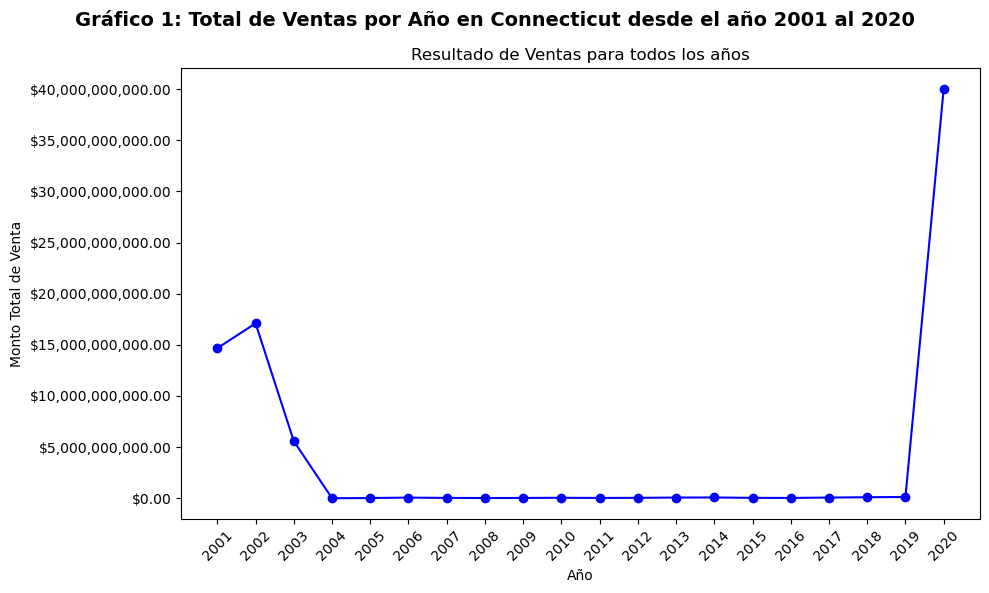

In [32]:
# Formato a número reales
pd.options.display.float_format = '{:.2f}'.format

# Gráfico lineal
plt.figure(figsize=(10, 6))
plt.plot(dfTemp.index, dfTemp.values, marker='o', linestyle='-', color='b')
plt.suptitle('Gráfico 1: Total de Ventas por Año en Connecticut desde el año 2001 al 2020', fontsize=14, fontweight='bold')
plt.title('Resultado de Ventas para todos los años')
plt.xlabel('Año')
plt.ylabel('Monto Total de Venta')

# Fijar eje x
plt.xticks(dfTemp.index, rotation=45)

# Definir el formateador personalizado para el eje y
def currency_formatter(x, pos):
    return '${:,.2f}'.format(x)

# Asignar el formateador al eje y
formatter = FuncFormatter(currency_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()

# Mostrar el Gráfico
plt.show()



<p Style = "text-align: justify"> Como se puede observar en esta gráfica, al tener algunos datos tan desproporcionales respecto a los demás, da la impresión que durante el periodo 2004 al 2019, no hubieron ventas, sin embargo, esto no es así, tal como se muestra en el gráfico a continuación. Lo que se puede concluir de este gráfico y de los datos mostrados en el chunk de código anterior, es que los años con el mayor monto de venta fueron el 2001, 2002, 2003 y 2020. Mientras que el menor fue el 2004.
</p>
</br>

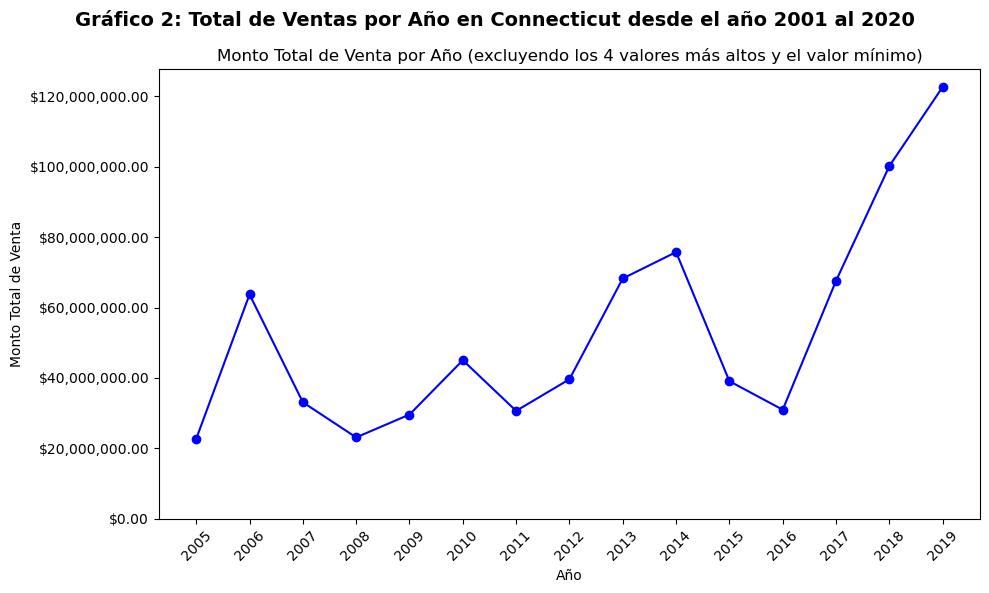

In [33]:
# Gráfico que excluye el valor mínimo y 4 valores más grandes.
exclude_values = dfTemp.nlargest(4).index.tolist() + [dfTemp.idxmin()]
filtered_df = dfTemp[~dfTemp.index.isin(exclude_values)]

# Formato a número reales
pd.options.display.float_format = '{:.2f}'.format

# Gráfico lineal
plt.figure(figsize=(10, 6))
plt.plot(filtered_df.index, filtered_df.values, marker='o', linestyle='-', color='b')
plt.suptitle('Gráfico 2: Total de Ventas por Año en Connecticut desde el año 2001 al 2020', fontsize=14, fontweight='bold')
plt.title('Monto Total de Venta por Año (excluyendo los 4 valores más altos y el valor mínimo)')
plt.xlabel('Año')
plt.ylabel('Monto Total de Venta')

# Fijar eje x
plt.xticks(filtered_df.index, rotation=45)

# Definir el formateador personalizado para el eje y
def currency_formatter(x, pos):
    return '${:,.2f}'.format(x)

# Asignar el formateador al eje y
formatter = FuncFormatter(currency_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylim(ymin=0)

plt.tight_layout()

# Mostrar el gráfico
plt.show()


<p Style = "text-align: justify">Como se indicó anteriormente, este gráfico nos muestra el comportamiento de los datos que se encuentran en rangos máscercanos. También podríamos decir que tienen una distribución más estable en el tiempo. Para esto fue necesario remover los4 montos de venta anuales más altos y el monto de venta anual más bajo (ya que es muy bajo en comparación con los demás).
</p>
</br>

<ul>
    <li>¿Qué tipo de propiedad tiene mayor facilidad de venta?</li>
</ul>

In [34]:
gf = df_proyecto.groupby(['propertyType']).count()
gf = gf.iloc[:,:1]
gf = gf.sort_values('serialNumber', ascending=False)
gf

,serialNumber
propertyType,
Residential,60506
Vacant Land,3131
Commercial,1951
Apartments,478
Industrial,225
Public Utility,5


<p Style = "text-align: justify"> Como se puede observar la propiedad que tiene mayor facilidad de venta es Residencial. Sin embargo se debe tomar en cuenta que para esta variable se tiene una limitación, ya que cuenta con un porcentaje de sesgo importante, siendo que los datos disponibles representan aproximadamente solo el 33% si se compara con el total de observaciones de otras variables. Por lo que se debe tomar en cuenta. Para esta variable considero que sería importante buscar más observaciones para poder mejorar la calidad y precisión del análisis.
</p>

<p Style = "text-align: justify"> Adicionalmente, para esta pregunta, debido a que son pocos tipos de propiedades,el grafico no representa una facilidad en la interpretacion de los datos, por lo que el cuadro se considera la forma mas sencilla y optima para visualizar esta informacion.
</p>
</br>

<ul>
    <li>¿En cuál ciudad o pueblo se dan mayor cantidad de ventas de propiedades? ¿Qué elementos particulares tienen esas ciudades o pueblos?</li>
</ul>

In [35]:
gf = df_proyecto.groupby(['town']).count()
gf = gf.iloc[:,:1]
gf = gf.sort_values('serialNumber', ascending=False)
gf

,serialNumber
town,
Stamford,7853
Bridgeport,5977
Norwalk,5872
Danbury,4667
Hartford,4399
...,...
Bozrah,95
Canaan,81
Union,79


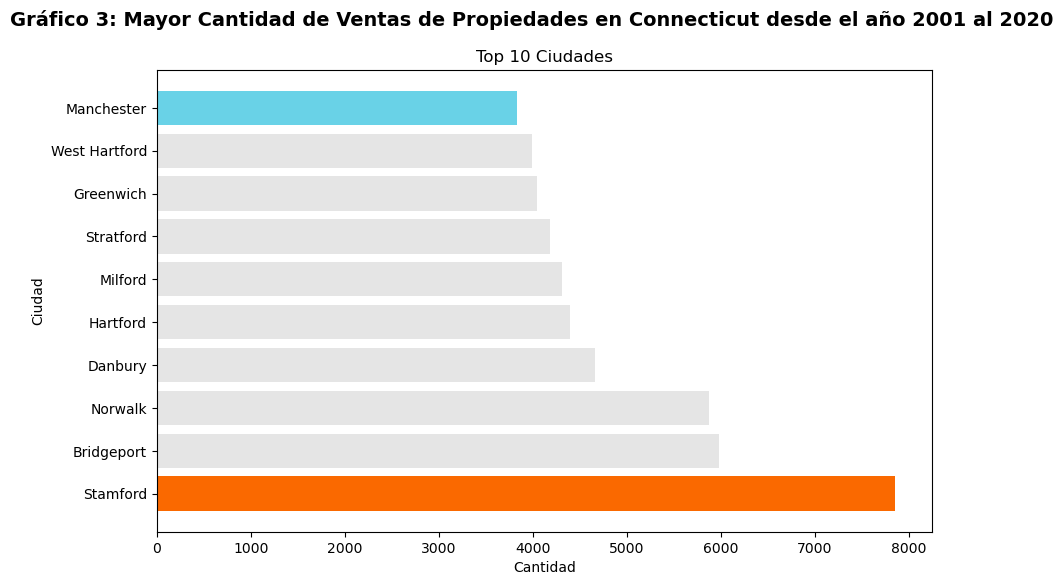

In [36]:
# Seleccionar el top 10 de ciudades
top_5_cities = gf.head(10)

# Definir colores
min_color = '#69d2e7'
max_color = '#fa6900'
other_color = '#e5e5e5'

# Generando la lista de colores para las barras.
colors = [max_color if town == top_5_cities['serialNumber'].idxmax() else
          min_color if town == top_5_cities['serialNumber'].idxmin() else
          other_color for town in top_5_cities.index]

# Aplicando color a las barras.
plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_cities.index, top_5_cities['serialNumber'], color=colors)

# Etiquetas y títulos
plt.xlabel('Cantidad')
plt.ylabel('Ciudad')
plt.suptitle('Gráfico 3: Mayor Cantidad de Ventas de Propiedades en Connecticut desde el año 2001 al 2020', fontsize=14, fontweight='bold')
plt.title('Top 10 Ciudades')

# Mostrar el gráfico
plt.show()



<p Style = "text-align: justify"> Como se puede apreciar en este gráfico donde se muestran las 10 principales ciudades con mayor cantidad de venta de propiedades, la que cuenta con el mayor número de venta de propiedades es la ciudad de Stamford.
</p>

<p Style = "text-align: justify"> En cuanto a los elementos particulares, las 10 principales ciudades tienen la particularidad de contar con usos mixtos de suelo, lo cual les permite entrar  dentro de todos los tipos de propiedades registradas en el set de datos. Adicionalmente, estas zonas son consideradas,desde el punto de vista urbano estratégicas y convenientes, lo cual las hace mucho más atractivas para  las inversiones que otras localidades.
</p>
</br>

<ul>
    <li>¿Cuál es el costo promedio de las propiedades residenciales y comerciales?</li>
</ul>

In [37]:
# Set de datos temporal para calcular el promedio de saleAmount por propertyType.
dfTemp_1 = df_proyecto.groupby('propertyType')['saleAmount'].mean()

# Formato para mostrar números reales.
pd.options.display.float_format = '{:,.0f}'.format

# Imprimir el set de datos.
print(dfTemp_1)


propertyType
Apartments       12,906,060
Commercial        1,771,752
Industrial        1,831,101
Public Utility      369,709
Residential         479,570
Vacant Land         295,714
Name: saleAmount, dtype: float64


<ul>
    <li> El costo promedio de venta de las propiedades residenciales es: \$479,570
    <li> El costo promedio de venta de las propiedades residenciales es: \$1,771,752</li>
</ul>

In [38]:
# Se procede a hacer lo mismo, pero utilizando la varaible assessedValue como referencia para el costo promedio de mercado.

# Set de datos temporal para calcular el promedio de assessedValue por propertyType.
dfTemp_1 = df_proyecto.groupby('propertyType')['assessedValue'].mean()

# Formato para mostrar número reales.
pd.options.display.float_format = '{:,.0f}'.format

# Mostrar el set de datos.
print(dfTemp_1)


propertyType
Apartments       1,174,074
Commercial       1,344,210
Industrial       1,139,501
Public Utility      73,466
Residential        289,879
Vacant Land        116,025
Name: assessedValue, dtype: float64


<ul>
    <li> El costo promedio de mercado de las propiedades residenciales es: \$289,879
    <li> El costo promedio de mercado de las propiedades residenciales es: \$1,344,210</li>
</ul>

<ul>
    <li> ¿Cuáles tipo de propiedades residenciales que se venden con mayor frecuencia, dónde y con qué costo promedio? </li>
</ul>


In [39]:
gf = df_proyecto.groupby(['residentialType']).count()
gf = gf.iloc[:,:1]
gf = gf.sort_values('serialNumber', ascending=False)
gf

,serialNumber
residentialType,
Single Family,43267
Condo,12661
Two Family,3199
Three Family,1488
Four Family,267


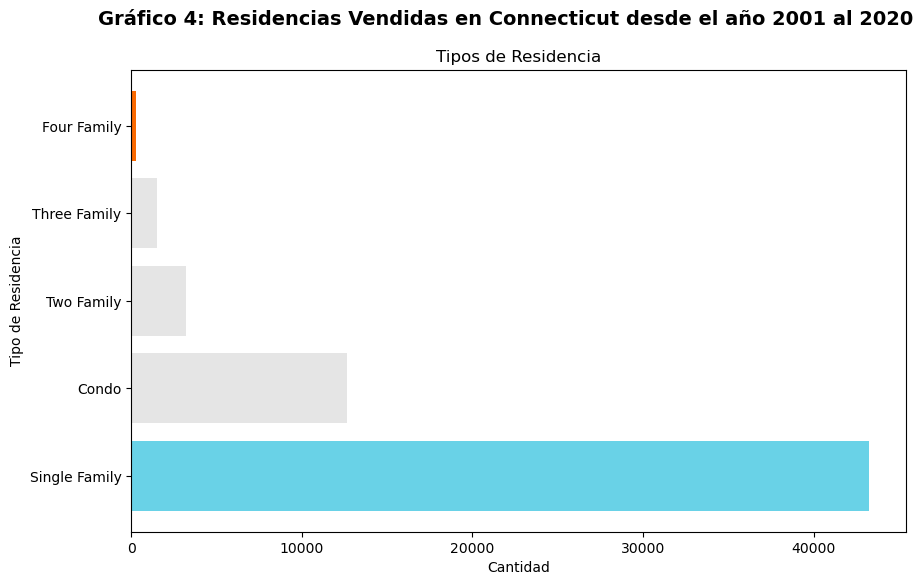

In [40]:
# Gráfico horizontal
plt.figure(figsize=(10, 6)) 
plt.barh(gf.index, gf['serialNumber'])
 
eje_x = gf.index.tolist()
data = gf["serialNumber"].tolist()

bar_colors = ['#69d2e7','#e5e5e5','#e5e5e5','#e5e5e5','#fa6900']

plt.barh(eje_x, data, color=bar_colors)

# Añadir etiquetas y títulos.
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Residencia')
plt.suptitle('Gráfico 4: Residencias Vendidas en Connecticut desde el año 2001 al 2020', fontsize=14, fontweight='bold')
plt.title('Tipos de Residencia')

# Mostrar gráfico 
plt.show()

</br>
<p Style = "text-align: justify">  Si bien el gráfico funciona para ver la distribución de los datos en los distintos tipos de propiedades residenciales, con el siguiente código se procede a responder las múltiples preguntas:
</p>

In [41]:
# Definición de variables, cálculos y funciones.
tipo_propiedad_frecuente = df_proyecto[df_proyecto['propertyType'] == 'Residential']['residentialType'].value_counts().idxmax()
ubicacion_tipo_frecuente = df_proyecto[(df_proyecto['propertyType'] == 'Residential') & (df_proyecto['residentialType'] == tipo_propiedad_frecuente)]['town'].value_counts().idxmax()
costo_promedio_tipo_frecuente = df_proyecto[(df_proyecto['propertyType'] == 'Residential') & (df_proyecto['residentialType'] == tipo_propiedad_frecuente)]['saleAmount'].mean()

# Formatear los costos promedio con decimales.
costo_promedio_tipo_frecuente= "{:,.2f}".format(costo_promedio_tipo_frecuente)

# Se imprimen los resultados
print("Tipo de propiedad residencial más frecuente:", tipo_propiedad_frecuente)
print("Ubicación donde se vende más el tipo de propiedad:", ubicacion_tipo_frecuente)
print("Costo promedio del tipo de propiedad más frecuente:", costo_promedio_tipo_frecuente)

Tipo de propiedad residencial más frecuente: Single Family
Ubicación donde se vende más el tipo de propiedad: Greenwich
Costo promedio del tipo de propiedad más frecuente: 514,808.96


<p Style = "text-align: justify"> Al igual que la variable de"propertyType", la variable de "residentialType" tiene la limitación de contar con un porcentaje de sesgo importante, siendo que los datos disponibles representan aproximadamente solo el 33% si se compara con el total de observaciones de otras variables. Por lo que se debe tomar en cuenta. Al igual que la anterior variable, considero que sería importante buscar más observaciones para mejorar la calidad y precisión del análisis.</p>
</br>

<ul>
    <li> ¿Cuál es el margen promedio de ganancia por cada una de las propiedades vendidas? </li>
</ul>

In [42]:
# Para obtener el margen promedio de ganancia se debe crear una nueva variable que sea equivalente al cálculo de las 
# variables saleAmount dividida entre assessedValue (saleAmount/assessedValue).
df_proyecto['salesRatio'] = df_proyecto['saleAmount'] / df_proyecto['assessedValue']

# Print the updated DataFrame
df_proyecto.head(5)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,propertyType,residentialType,salesRatio
0,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,"150,500","325,000",Commercial,NaN,2
1,20002,2020,10/2/2020,Ashford,390 TURNPIKE RD,"253,000","430,000",Residential,Single Family,2
2,200212,2020,3/9/2021,Avon,5 CHESTNUT DRIVE,"130,400","179,900",Residential,Condo,1
3,200243,2020,4/13/2021,Avon,111 NORTHINGTON DRIVE,"619,290","890,000",Residential,Single Family,1
4,200377,2020,7/2/2021,Avon,70 FAR HILLS DRIVE,"862,330","1,447,500",Residential,Single Family,2


In [43]:
# Como algunos resultados de salesRatio son = 0, y para evitar que por esta razón el output sea infinito, 
# se tiene el siguiente chunk de codigo: 
filtered_df = df_proyecto[df_proyecto['assessedValue'] != 0]

# Cálculo del promedio de la variable "sales ratio"
sales_ratio_mean = filtered_df['salesRatio'].mean()

# Impresión de la media
print("Margen Promedio de Ganancia:", sales_ratio_mean)

Margen Promedio de Ganancia: 5.644976953856372


<p Style = "text-align: justify"> Es importante indicar que si bien en un inicio el set de datos contaba con esta variable, al hacer un mayor análisis de la misma, se decidió eliminar y proceder a hacer el cálculo con los datos disponibles de las variables saleAmpunt y assessedValue, para darle mayor accuracy al dato.</p>
</br>

<p Style = "text-align: center"> Hasta aquí llegan los resultados de mi análisis del proyecto. </p>
</br>